<a href="https://colab.research.google.com/github/akhiluthappa1/data_science/blob/main/akhil_uthappa_trading_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Insomnia trading - Homework 4

### Q1 & Q2 (Nightly profit, Long and short position returns) - *Apple*

In [ ]:
import pandas as pd

money_available = 100
shares = 0
week_count = 1
buy_flag = False
flag = False #False when cashed out; true when invested in the stock


df_detailed = pd.read_csv("/content/AAPL_weekly_return_detailed (1).csv",sep=",") #data with prices
df = df_detailed[(df_detailed["Year"].isin([2020,2021]))]
df = df[['Open','Close']]

#Functions defined for stock purchase and amount
def stock_amount (cash,purchse_value):
    stock_bought = round(cash/purchse_value, 4) #the value is increased to 4 decimal values as stock amounts add up to 4 digits and causee significant changes
    return stock_bought
def buy_out (shares, buy_out_value):
    total_amount = shares * buy_out_value
    total_amount = round (total_amount, 4)
    return total_amount

money_long_percent = 100
money_short_percent = 100
money_long = 0
money_short = 0
trades = 0
money_each_day_my_stock_array = []
normalised_buy_and_hold_value_each_day = []
open_price_of_my_stock_day_1 = df.iloc[0]['Close']

for i in range(len(df.index)-1):
    
    if(df.iloc[i]['Open'] < df.iloc[i]['Close']):
        trades += 1
        buy = money_available
        shares = stock_amount(money_available, df.iloc[i]['Close'])
        money_available = buy_out(shares, df.iloc[i+1]["Open"])
        sell = money_available
        money_long += sell - buy
        money_long_percent = money_long_percent*(1+((sell - buy)/100))
        
    elif(df.iloc[i]['Open'] > df.iloc[i]['Close']):
        trades += 1
        buy = money_available
        shares = stock_amount(money_available, df.iloc[i+1]["Open"])
        money_available = buy_out(shares, df.iloc[i]['Close'])
        sell = money_available
        money_short += sell - buy
        money_short_percent = money_short_percent*(1+((sell - buy)/100))
        
    money_each_day_my_stock_array.append(money_available)
    normalised_buy_and_hold_value_each_day.append(df.iloc[i]['Close']/open_price_of_my_stock_day_1*100)
    
print ("VALUES FOR APPLE")    
print("Money Available for APPLE = ", money_available)   
print("Money when traded long = ", money_long)   
print("Money when traded short = ", money_short)  
print("Money long percent = ", money_long_percent)   
print("Money short percent = ", money_short_percent)  
print("Total Trades = ",trades)
print("Profit per trade = ",(money_available-100)/trades)
        

VALUES FOR APPLE
Money Available for APPLE =  138.2098
Money when traded long =  37.76049999999995
Money when traded short =  0.44930000000005066
Money long percent =  138.81536178042086
Money short percent =  97.12355671762562
Total Trades =  503
Profit per trade =  0.07596381709741551


### Q1 & Q2 (Nightly profit, Long and short position returns) - SPY

In [ ]:
money_available = 100
shares = 0
week_count = 1
buy_flag = False
flag = False #False when cashed out; true when invested in the stock


df = pd.read_csv("SPY_weekly_return_detailed.csv",sep=",")
df = df[['Open','Close']]


def stock_amount (cash,purchse_value):
    stock_bought = round(cash/purchse_value, 4)#the value is increased to 4 decimal values as stock amounts add up to 4 digits and causee significant changes
    return stock_bought
def buy_out (shares, buy_out_value):
    total_amount = shares * buy_out_value
    total_amount = round (total_amount, 4)
    return total_amount

money_long_percent = 100
money_short_percent = 100
money_long = 0
money_short = 0
trades = 0
money_each_day_spy_array = []

for i in range(len(df.index)-1):
    if(df.iloc[i]['Open'] < df.iloc[i]['Close']):
        trades += 1
        buy = money_available
        shares = stock_amount(money_available, df.iloc[i]['Close'])
        money_available = buy_out(shares, df.iloc[i+1]["Open"])
        sell = money_available
        money_long += sell - buy
        money_long_percent = money_long_percent*(1+((sell - buy)/100))
        
    elif(df.iloc[i]['Open'] > df.iloc[i]['Close']):
        trades += 1
        buy = money_available
        shares = stock_amount(money_available, df.iloc[i+1]["Open"])
        money_available = buy_out(shares, df.iloc[i]['Close'])
        sell = money_available
        money_short += sell - buy
        money_short_percent = money_short_percent*(1+((sell - buy)/100))
        
    money_each_day_spy_array.append(money_available)
    
print ("OUTPUT VALUES FOR SPY")    
print("Money Available SPY = ", money_available)   
print("Money when traded long = ", money_long)   
print("Money when traded short = ", money_short)  
print("Money long percent = ", money_long_percent)   
print("Money short percent = ", money_short_percent)  
print("Total Trades = ",trades)
print("Profit per trade = ",(money_available-100)/trades)



OUTPUT VALUES FOR SPY
Money Available SPY =  99.8874
Money when traded long =  9.206100000000177
Money when traded short =  -9.318700000000177
Money long percent =  107.80623216582956
Money short percent =  89.883328371046
Total Trades =  501
Profit per trade =  -0.00022475049900199696


### 2. I|s the profit from ”long” positions (when you buy) higher or lower than your profit from ’short” positions (when you sell short)? What is more profitable: long or short positions?

Long trades are more profitable for me than Short trades

### Q 3&4. What is the profit per trade for apple based on threshold values for regular, long and short trading?

In [ ]:
df_detailed = pd.read_csv("/content/AAPL_weekly_return_detailed (1).csv",sep=",") #data with prices
df = df_detailed[(df_detailed["Year"].isin([2020,2021]))]
df = df[['Open','Close']]

print(df)

def stock_amount (cash,purchse_value):
    stock_bought = round(cash/purchse_value, 4)
    return stock_bought
def buy_out (shares, buy_out_value):
    total_amount = shares * buy_out_value
    total_amount = round (total_amount, 4)
    return total_amount

thresholds = (x * 0.1 for x in range(0, 100)) #taking a 10% increase or decrease for 100 threshold values

percent_change_array = []
profit_per_trade_array = []
profit_per_trade_long_array = []
profit_per_trade_short_array = []


for percent_change in thresholds:
    percent_change_array.append(percent_change)
    money_available = 100
    shares = 0
    week_count = 1
    buy_flag = False
    flag = False #False when cashed out; true when invested in the stock
    money_long_percent = 100
    money_short_percent = 100
    money_long = 0
    money_short = 0
    trades = 0
    trades_long = 0
    trades_short = 0
    
    for i in range(len(df.index)-1):
        if((df.iloc[i]['Open'] < df.iloc[i]['Close']) and (((df.iloc[i]['Close'] - df.iloc[i]['Open'])*100/df.iloc[i]['Open'])>percent_change)):
            trades += 1
            trades_long += 1
            buy = money_available
            shares = stock_amount(money_available, df.iloc[i]['Close'])
            money_available = buy_out(shares, df.iloc[i+1]["Open"])
            sell = money_available
            money_long += sell - buy
            money_long_percent = money_long_percent*(1+((sell - buy)/100))
            
        elif(df.iloc[i]['Open'] > df.iloc[i]['Close'] and (((abs(df.iloc[i]['Close'] - df.iloc[i]['Open'])*100/df.iloc[i]['Open'])>percent_change))):
            trades += 1
            trades_short += 1
            buy = money_available
            shares = stock_amount(money_available, df.iloc[i+1]["Open"])
            money_available = buy_out(shares, df.iloc[i]['Close'])
            sell = money_available
            money_short += sell - buy
            money_short_percent = money_short_percent*(1+((sell - buy)/100))
            
    print("Percentage change = ",percent_change)
    print("Regular Trades")
    print("No. of Trades = ",trades)
    if(trades!=0):
        
        print("Regular: Profit per trade = ",(money_available-100)/trades)
        profit_per_trade_array.append((money_available-100)/trades)
    else:
        profit_per_trade_array.append(0)
    print("Long Trades")
    print("Trades long = ",trades_long)
    if(trades_long!=0):
        print("Long: Profit per trade = ",(money_long)/trades_long)
        profit_per_trade_long_array.append((money_long)/trades_long)
    else:
        profit_per_trade_long_array.append(0)
    print("Short Trades")
    print("Trades short = ",trades_short)
    if(trades_short!=0):
        print("Short: Profit per trade = ",(money_short)/trades_short)
        profit_per_trade_short_array.append((money_short)/trades_short)
    else:
        profit_per_trade_short_array.append(0)
    
    print("-----------------------------------")

              


           Open       Close
0     74.059998   75.087502
1     74.287498   74.357498
2     73.447502   74.949997
3     74.959999   74.597504
4     74.290001   75.797501
..          ...         ...
499  175.850006  176.279999
500  177.089996  180.330002
501  180.160004  179.289993
502  179.330002  179.380005
503  179.470001  178.199997

[504 rows x 2 columns]
Percentage change =  0.0
Regular Trades
No. of Trades =  503
Regular: Profit per trade =  0.07596381709741551
Long Trades
Trades long =  270
Long: Profit per trade =  0.1398537037037035
Short Trades
Trades short =  233
Short: Profit per trade =  0.0019283261802577282
-----------------------------------
Percentage change =  0.1
Regular Trades
No. of Trades =  474
Regular: Profit per trade =  0.07351054852320674
Long Trades
Trades long =  257
Long: Profit per trade =  0.13711789883268438
Short Trades
Trades short =  217
Short: Profit per trade =  -0.0018216589861746188
-----------------------------------
Percentage change =  0.2
Regul

### Q3. Observations and graph plotting for percentage change for regular trade, long and short selling

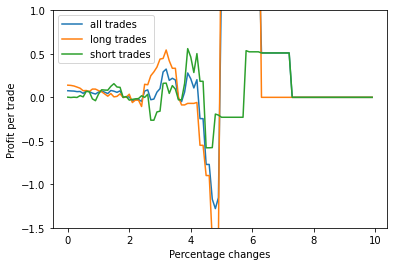

In [ ]:
#For Apple 
import matplotlib.pyplot as plt
import numpy as np
  
plt.plot(percent_change_array, profit_per_trade_array, label = "all trades")
plt.plot(percent_change_array, profit_per_trade_long_array, label = "long trades")
plt.plot(percent_change_array, profit_per_trade_short_array, label = "short trades")
  
plt.xlabel("Percentage changes")
plt.ylabel("Profit per trade")
plt.ylim([-1.5, 1])
plt.legend()
plt.show()

#### Observations for Q3&4:
Adidas Stock:
The stock has more profits for the smaller percentage changes, The long trades is the best methodology with a highest peak with percentage changes of values below 2, in short trading there is a peak at a value post 3% after a steady decline and performs badly with higher percentage changes. 

### Q5. On the same plot, show the growth of your portfolio for your stock and SPY and buy-and-hold strategy

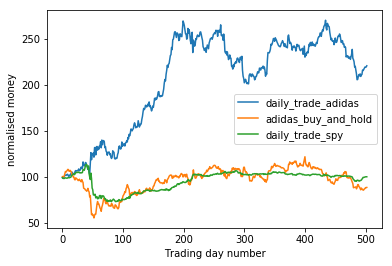

In [ ]:
#The below graph shows the plotting of the portfolio growth for SPY and Adiads in daily trading strategy and for the buy and hold strategy post normalizing the values
import matplotlib.pyplot as plt
import numpy as np

days_list = list(range(1, 504))
  
plt.plot(money_each_day_my_stock_array, label = "daily_trade_adidas")
plt.plot(normalised_buy_and_hold_value_each_day, label = "adidas_buy_and_hold")
plt.plot(money_each_day_spy_array, label = "daily_trade_spy")
  
plt.xlabel("Trading day number")
plt.ylabel("normalised money")
plt.legend()
plt.show()
